# Description
This data about Fish market we should know the weight of the fish
### cotent:
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

# Agenda 
1- import Libraries

2- Load The Data

3- Handle Missing Values if existed

4- Make some visuaization

5- Use the Linear Regression Algorithem

#### import the data

In [1]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
plt.style.use('seaborn')

#### Load the data

In [2]:
df = pd.read_csv("datasets_229906_491820_Fish.csv")
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [3]:
df.shape

(159, 7)

#### check if there are any missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.1+ KB


In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


#### we will rename the (Length1 ,Length2 ,Length3) columns names  

In [6]:
df.rename(columns={'Length1':'vertical length' , 'Length2':'diagonal length' , 'Length3':'cross length'}, inplace=True)

In [7]:
df.head()

,Species,Weight,vertical length,diagonal length,cross length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


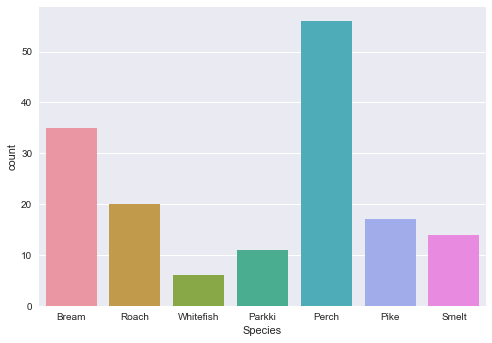

In [8]:
sns.countplot(df.Species)

#### drop the Species column , we don't neet this feature becouse it dosen't affcet the weight

In [9]:
df.drop(columns=['Species'] , axis=0 , inplace=True)

In [10]:
df.head()

,Weight,vertical length,diagonal length,cross length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


#### make scatter plots between (vertical length , diagonal length , cross length ,Height ,Width) and weight to see if there are any relation between them

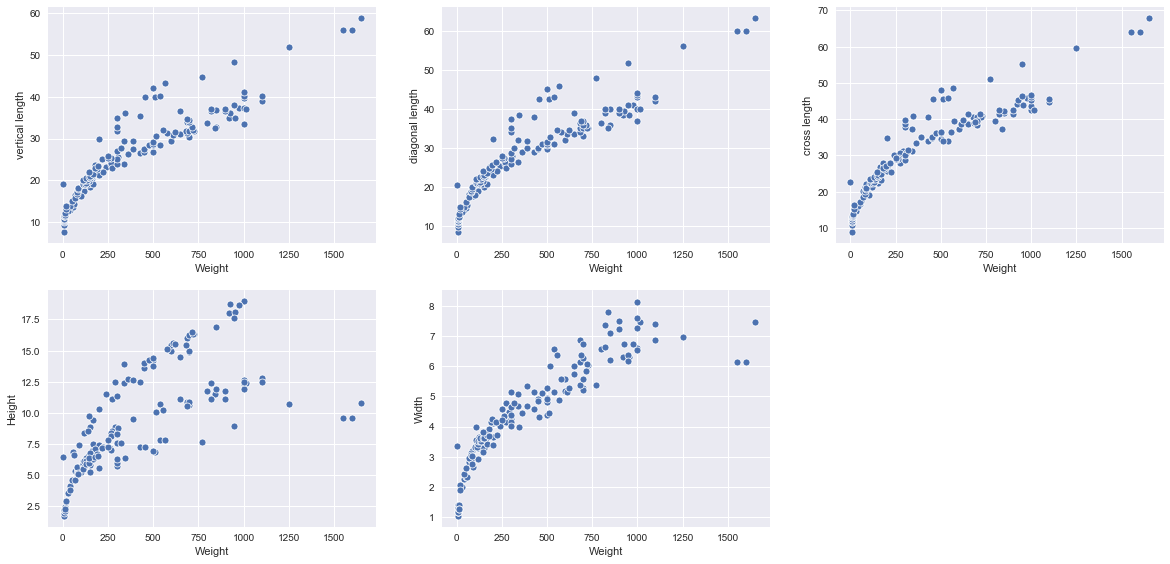

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.scatterplot(x=df.Weight , y=df['vertical length'] , data=df )
plt.subplot(4,3,2)
sns.scatterplot(x=df.Weight , y=df['diagonal length'] , data=df)
plt.subplot(4,3,3)
sns.scatterplot(x=df.Weight , y=df['cross length'] , data=df)
plt.subplot(4,3,4)
sns.scatterplot(x=df.Weight , y=df['Height'] , data=df)
plt.subplot(4,3,5)
sns.scatterplot(x=df.Weight , y=df['Width'] , data=df)

##### as we can see weight depends on these features

#### Now , we will do boxplot for these features 

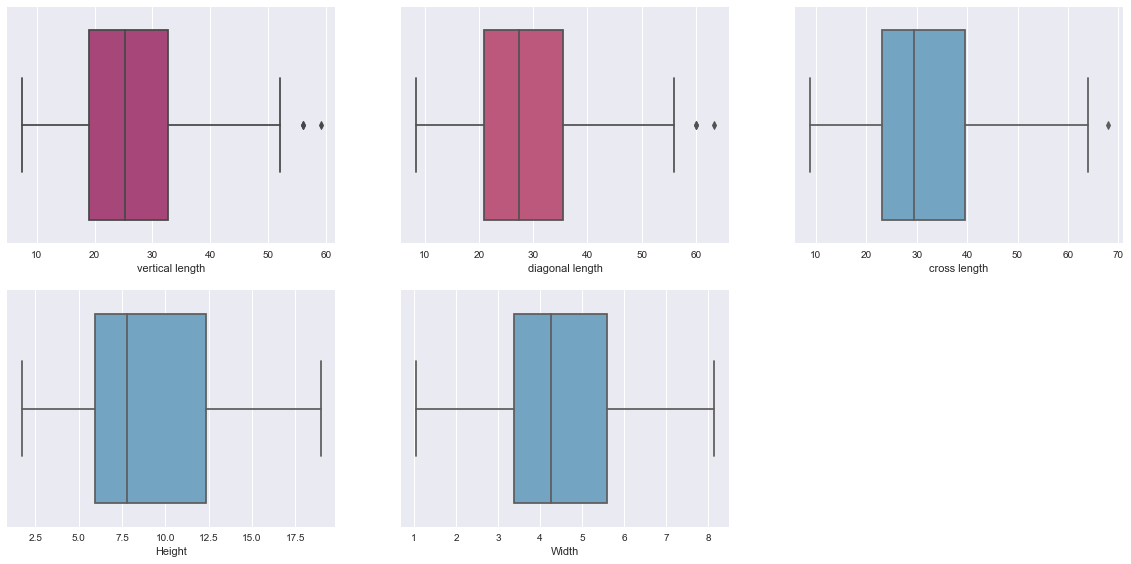

In [12]:

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.boxplot(df['vertical length']  , palette=('magma')  )
plt.subplot(4,3,2)
sns.boxplot(df['diagonal length'] , palette=('plasma'))
plt.subplot(4,3,3)
sns.boxplot(df['cross length'] , palette=('PuBuGn'))
plt.subplot(4,3,4)
sns.boxplot(df['Height'], palette=('PuBuGn'))
plt.subplot(4,3,5)
sns.boxplot(df['Width'], palette=('PuBuGn'))

##### there are outliers in three types of length , so we will detrmine and drop them

In [13]:
df[df['vertical length']>55]
df[df['diagonal length']>55]
df[df['cross length']>62]

,Weight,vertical length,diagonal length,cross length,Height,Width
142,1600.0,56.0,60.0,64.0,9.600,6.144
143,1550.0,56.0,60.0,64.0,9.600,6.144
144,1650.0,59.0,63.4,68.0,10.812,7.480


In [14]:
df.drop([142,143,144] , inplace=True) 

#### Drow the heatmap to all data

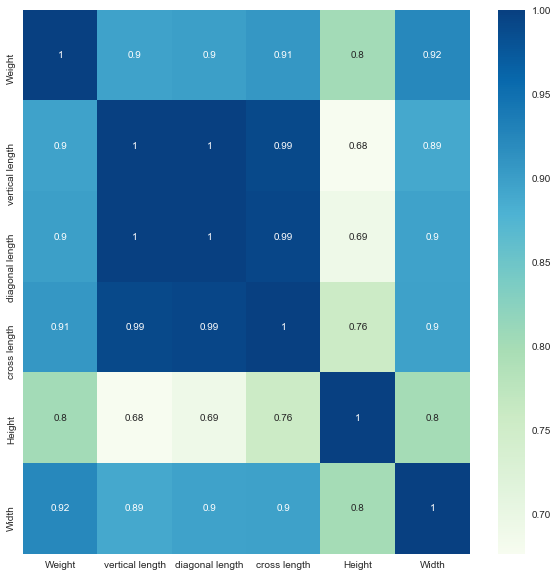

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='GnBu')

#### Now we will predict the weight by using Linear Regression

In [17]:
y = df.iloc[: , :1]
X = df.iloc[: , 1:] 

#### split the data into traininf and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21) 

#### Usig Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### predict the test

In [20]:
y_pred = reg.predict(X_test)

### find the accurecy

In [21]:
reg.score(X_train, y_train)

0.9121990257521558

#### git coefficients

In [22]:
reg.coef_ 

array([[ 38.98524714,   8.30701372, -30.11538363,  31.24909299,
         55.83064227]])

#### git intercept

In [23]:
reg.intercept_  

array([-461.92591112])

#### calculate the mean of cross validation score

In [24]:
from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(reg, X_train, y_train, cv=10)
cv_result.mean()

0.8918510815621161

#### find the score with Ridge

In [25]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha = 0.1 , normalize = True)
ridge.fit(X_train,y_train)
r_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)

0.8500650580452488

#### find the score with Lasso

In [26]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha = 0.1 , normalize = True)
lasso.fit(X_train,y_train)
l_pred=lasso.predict(X_test)
lasso.score(X_test,y_test)

0.8531719660885827

#### Calculate the mean squared error

In [27]:
from sklearn.metrics import mean_squared_error
MSE_lr=mean_squared_error(y_test,y_pred)

Soooo bad :(

In [28]:
MSE_lr

12271.969302069188

#### Try the MinMaxScaler

In [29]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler()

MinMaxScaler(copy=True, feature_range=(0, 1))

#### Try the StandardScaler

In [30]:
from sklearn.preprocessing import StandardScaler
StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Minmize the loss

In [31]:
from scipy.optimize import minimize 
minimize(np.square , 0).x

array([0.])

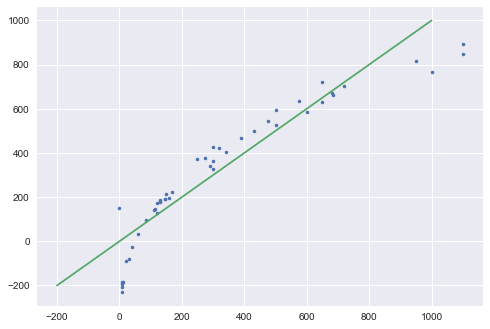

In [32]:
y_pred = reg.predict(X_test) 
plt.plot(y_test, y_pred, '.')

#plot a line, a perfit predict would all fall on this line
x = np.linspace(-200, 1000, 100)
y = x
plt.plot(x, y)
plt.show()